# DL1 - Deep Learning Task 1: Classification using MediaPipe on Hand Gesture Recognition Image Dataset (HaGRID)
### This was the ML1 project. I have implemented it using Classical ML Models (SVM).
#### In this notebook, I reimplemented it using a Simple Neural Network using Pytorch.
##### Delivered by 
- Mohamed Abdelmohsen Soliman

## **Importing the required libraries**

In [1]:
import pandas as pd
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import cv2

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

### Libraries Versions

In [2]:
## Libraries version check
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Mediapipe version: {mp.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"OpenCV version: {cv2.__version__}")
print(f"PyTorch version: {torch.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")

Pandas version: 2.3.0
Numpy version: 1.26.4
Mediapipe version: 0.10.21
Matplotlib version: 3.10.3
Seaborn version: 0.13.2
OpenCV version: 4.11.0
PyTorch version: 2.2.2
Scikit-learn version: 1.7.0


### Reading the data from a CSV using **Pandas** Library

In [3]:
df = pd.read_csv('hand_landmarks_data.csv')

### Viewing the dataset's first 10 rows to check the format of the data

In [4]:
df.head(10)

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call
5,272.454918,300.478027,-1.558500e-07,268.653831,289.496490,-0.001184,262.705101,277.195679,-0.005392,260.303741,...,238.565414,298.517212,-0.033287,232.653122,300.183655,-0.034929,228.136322,300.597046,-0.036323,call
6,286.232712,237.393692,-2.901210e-07,279.311211,221.710007,-0.003649,268.601692,209.613953,-0.009611,259.686699,...,235.806450,249.757019,-0.031268,226.319275,253.601776,-0.030820,218.499344,255.185120,-0.029436,call
7,114.953327,259.844932,-1.876879e-07,124.577408,245.503576,-0.003558,141.268433,233.379068,-0.009585,152.556953,...,157.018993,277.370584,-0.034591,163.292107,283.455908,-0.033233,168.722946,288.635302,-0.032251,call
8,178.488205,155.593403,-1.192177e-07,181.804916,150.058811,0.001126,186.087662,145.495102,-0.000282,189.005142,...,197.488068,162.990864,-0.007713,200.333069,163.943047,-0.006301,202.600998,164.469223,-0.004961,call
9,168.305664,192.957962,-2.186004e-07,175.203232,179.443233,0.001042,187.103836,168.054268,-0.003638,194.959793,...,218.690704,205.454773,-0.025292,227.284714,209.844543,-0.023056,235.106216,212.417679,-0.021292,call


#### So, we have **21 Xs**, **21 Ys**, and **21 Zs** and the Target Label, **63 features** + 1 target label = **64 total columns**

### Printing the DataFrame Info to count Nulls and see the datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

In [6]:
print("Number of nulls found in the HaGRID Dataset = ", df.isnull().sum().sum())

Number of nulls found in the HaGRID Dataset =  0


#### As seen after executing the above cell, we found no Null values! Nothing to impute or drop. We are safe to go

## **Data Visualization**

### To assess the overall structure of the dataset, we explore the distribution and balance of values in order to understand variability, central tendency, and deviation patterns.

##### **Data Balance Check**

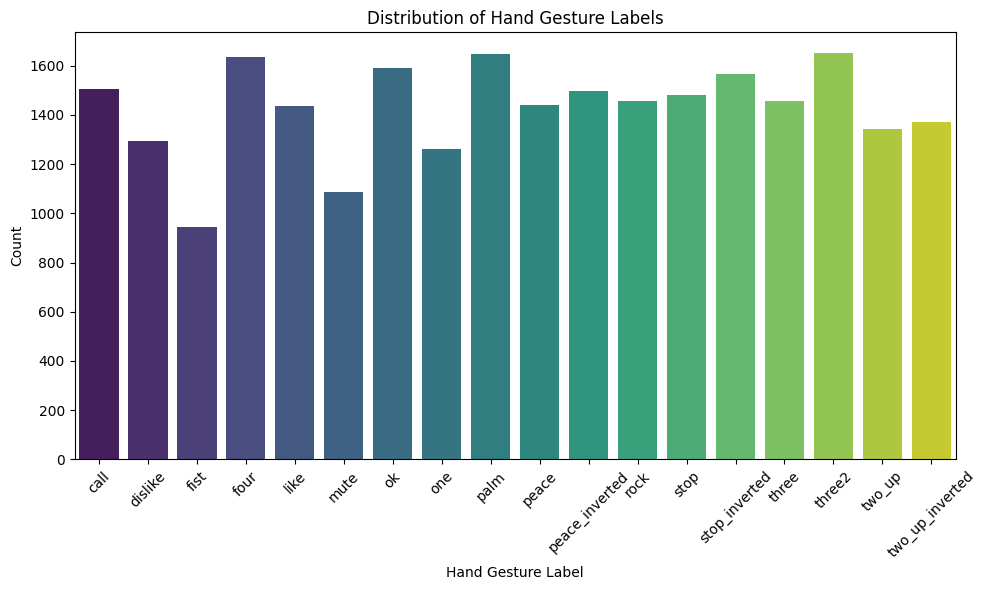

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x="label", data=df, hue = 'label', palette='viridis')
plt.title('Distribution of Hand Gesture Labels')
plt.xlabel('Hand Gesture Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Most hand gestures labels are nearly balanced except 2 labels: Fist & mute. They are a bit of underly sampled compared to the others

#### Now, lets Visualize some of the keypoints for some randomized samples and plot its landmarks

In [8]:
def get_landmarks(row):
    # here I am extracting the x, y, z coordinates of the 21 hand landmarks from the dataframe row and returning them as numpy arrays
    xs = [row[f"x{i}"] for i in range(1, 22)]
    ys = [row[f"y{i}"] for i in range(1, 22)]
    zs = [row[f"z{i}"] for i in range(1, 22)]
    return np.array(xs), np.array(ys), np.array(zs)

def finger_color(idx):
    # this function assigns a specific color to each finger based on the index of the landmark,
    # which helps in visualizing the hand skeleton with different colors for each finger
    if idx == 0: return '#AAAAAA'
    if idx <= 4: return '#FF6B6B'
    if idx <= 8: return '#FFE66D'
    if idx <= 12: return '#4ECDC4'
    if idx <= 16: return '#A29BFE'
    return '#FD79A8'

CONNECTIONS = [ # here we are defining the connections between the landmarks to form the hand skeleton
    (0,1),(1,2),(2,3),(3,4),
    (0,5),(5,6),(6,7),(7,8),
    (0,9),(9,10),(10,11),(11,12),
    (0,13),(13,14),(14,15),(15,16),
    (0,17),(17,18),(18,19),(19,20),
    (5,9),(9,13),(13,17),
]

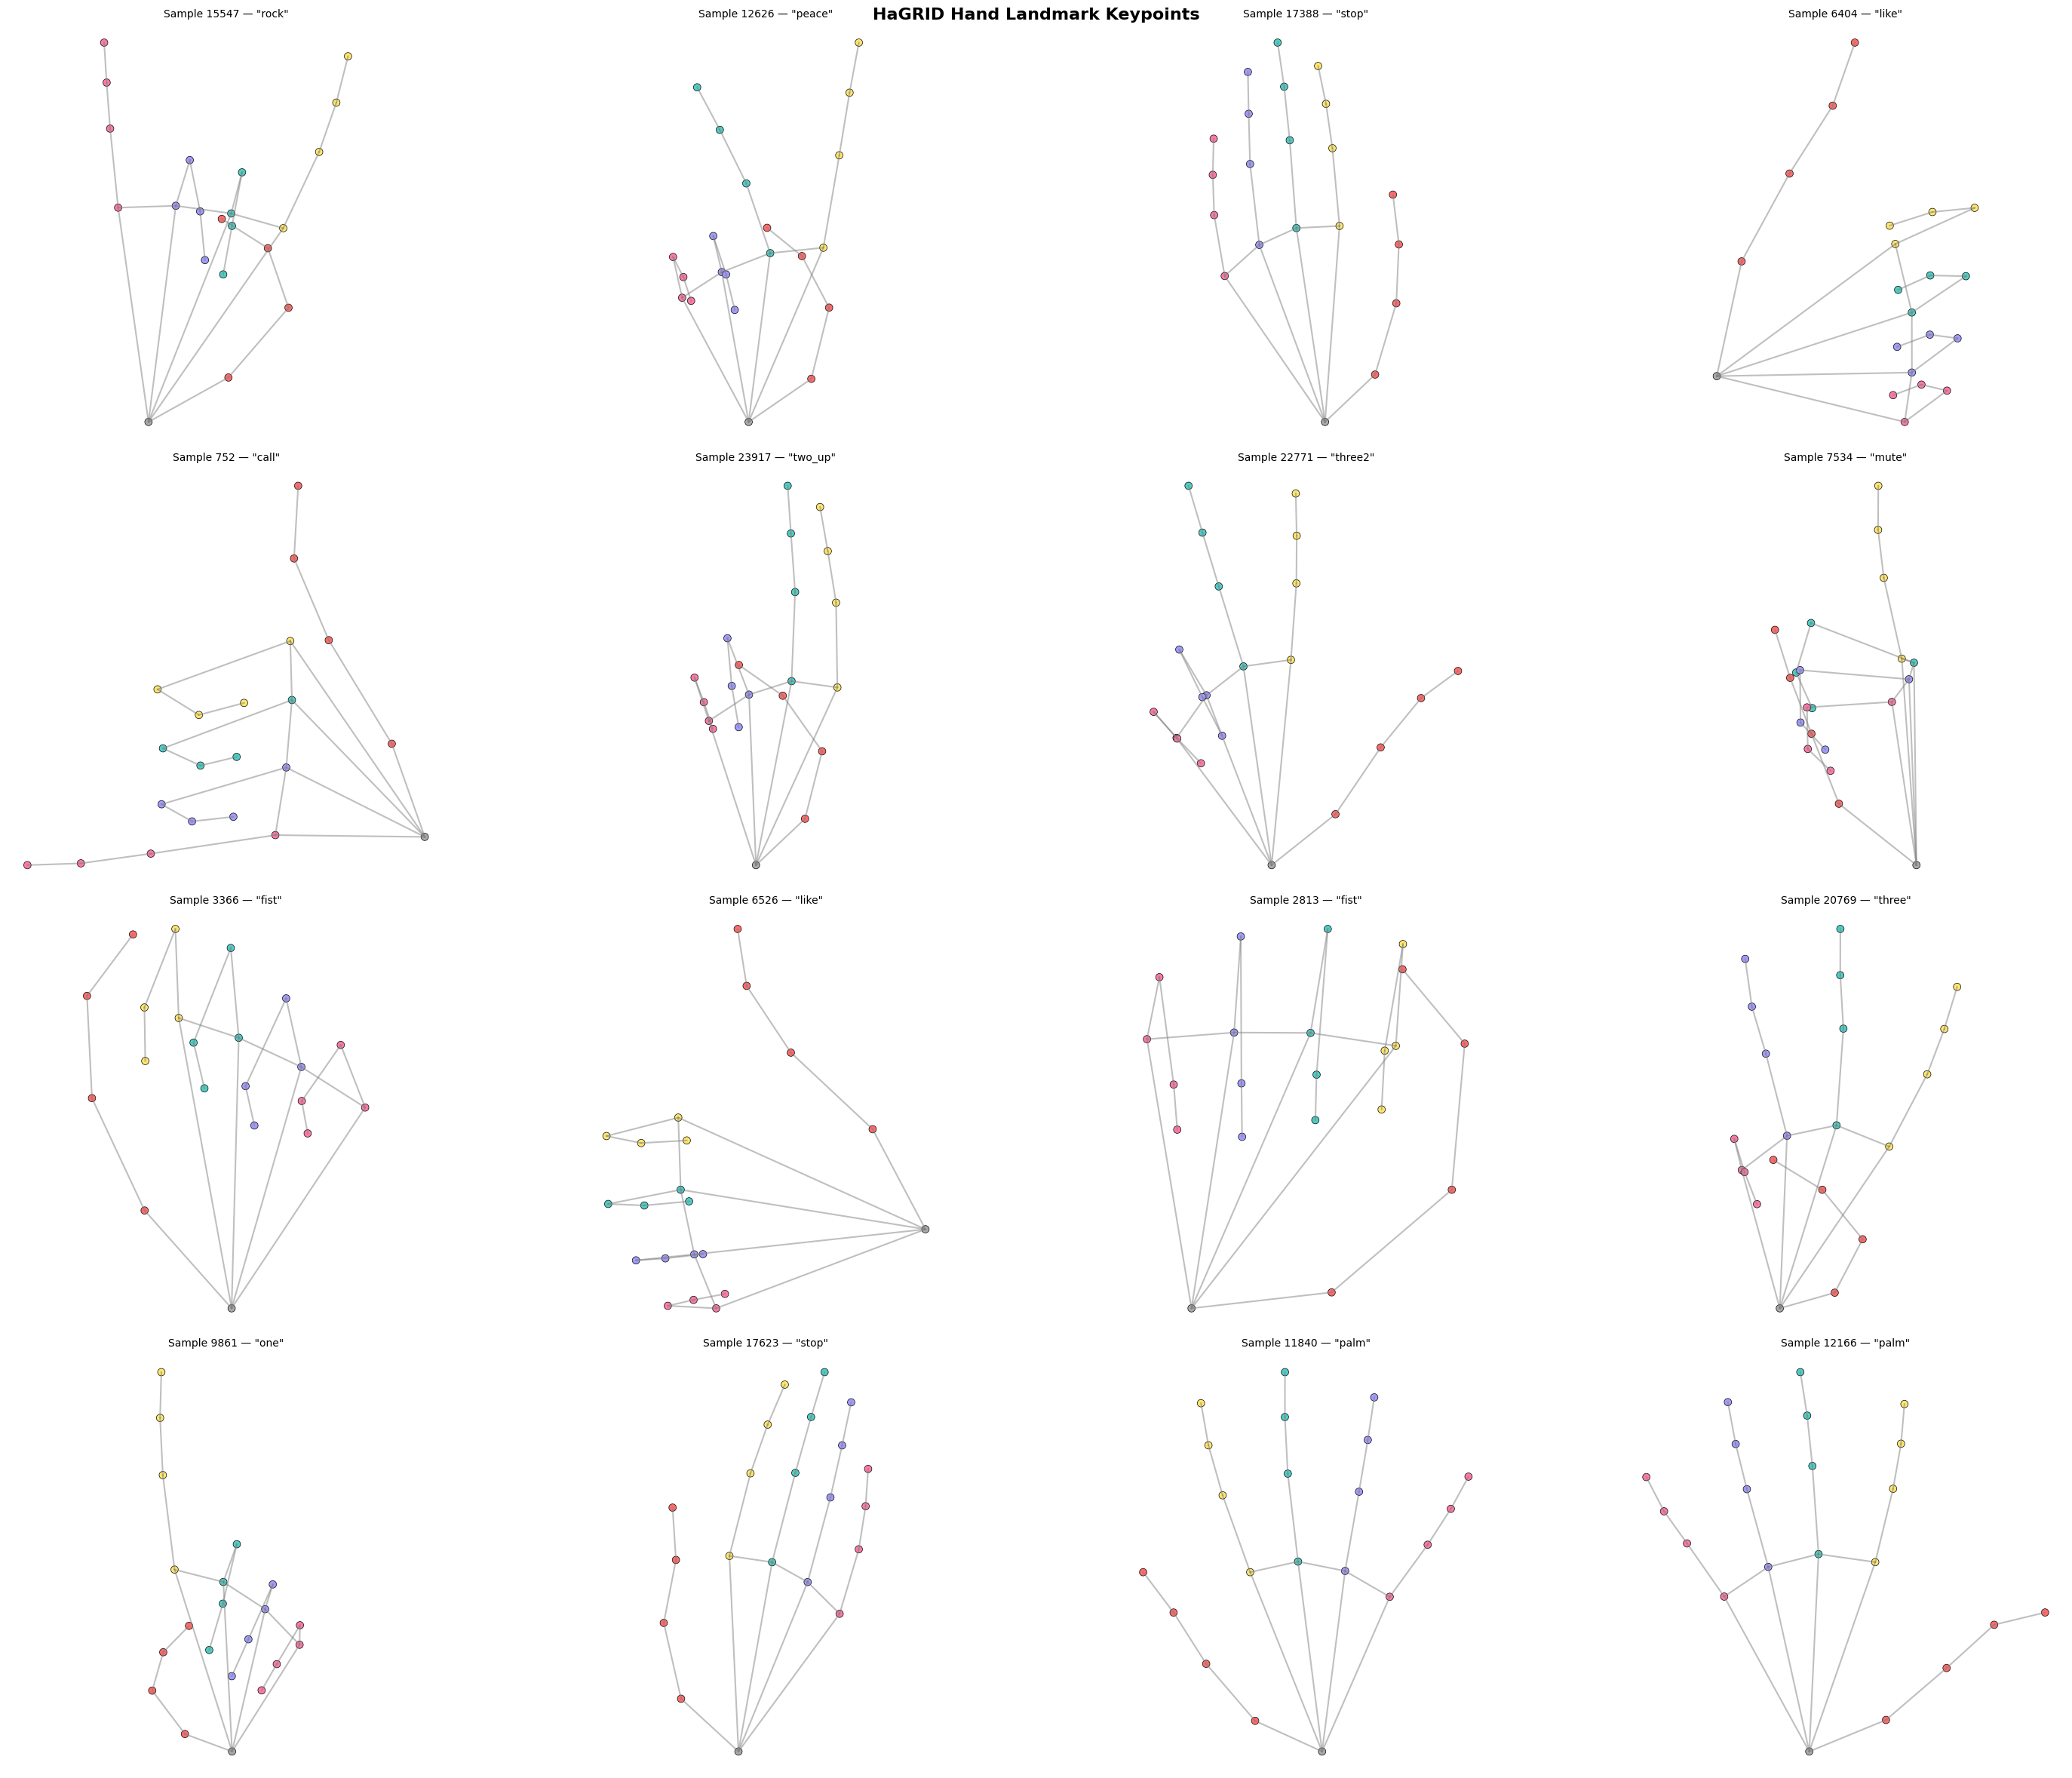

In [9]:
n_samples = 16
fig, axes = plt.subplots(4, 4, figsize=(30, 24))
axes = axes.flatten()

fig.suptitle("HaGRID Hand Landmark Keypoints", fontsize=16, fontweight='bold')

sampled_df = df.sample(n_samples, random_state=42)

for i, (idx, row) in enumerate(sampled_df.iterrows()): # iterating through the sampled dataframe to visualize the hand landmarks for each sample
    ax = axes[i]
    xs, ys, zs = get_landmarks(row)

    for (a, b) in CONNECTIONS:
        ax.plot([xs[a], xs[b]], [ys[a], ys[b]],
                c='gray', lw=1.5, alpha=0.5)

    colors = [finger_color(i) for i in range(21)]
    ax.scatter(xs, ys, c=colors, s=50,
               edgecolors='black', linewidths=0.5)

    ax.invert_yaxis()
    ax.set_title(f'Sample {idx} — "{row["label"]}"', fontsize=10)
    ax.set_aspect('equal')
    ax.axis("off")

plt.tight_layout()
plt.show()

#### Those are samples of the landmarks and keypoints that on the hand shape

## **Preprocessing & Normalization**

#### Detecting Outliers

In [10]:
X = df.iloc[:, :-1]
Y = df['label']
Y

0                   call
1                   call
2                   call
3                   call
4                   call
              ...       
25670    two_up_inverted
25671    two_up_inverted
25672    two_up_inverted
25673    two_up_inverted
25674    two_up_inverted
Name: label, Length: 25675, dtype: object

### I will Group each label and detect the outliers within

In [11]:
def OutlierDetect_IQR(X, Y):
    outlier_indices = []
    LabelsOuts = {}
    for label in Y.unique():        
        label_mask = Y == label
        X_label = X[label_mask]
        
        Q1 = X_label.quantile(0.25)
        Q3 = X_label.quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outlier_mask = ((X_label < lower_bound) | 
                        (X_label > upper_bound)).any(axis=1)
        
        original_indices = X_label.index[outlier_mask].tolist()
        outlier_indices.extend(original_indices)
        LabelsOuts[label] = original_indices
    return outlier_indices, LabelsOuts

#### Seeing the count of the outliers detected in the dataset

In [12]:
OutS, LabelsOuts = OutlierDetect_IQR(X, Y)

print(f"\n=== SUMMARY ===")
print(f"Total samples: {len(df)}")
print(f"Total outliers: {len(OutS)}")

for label in Y.unique():
    print(f"Label '{label}': {len(LabelsOuts[label])} outliers")
    
print(f"Clean samples: {len(df) - len(OutS)}")


=== SUMMARY ===
Total samples: 25675
Total outliers: 3783
Label 'call': 314 outliers
Label 'dislike': 270 outliers
Label 'fist': 162 outliers
Label 'four': 143 outliers
Label 'like': 296 outliers
Label 'mute': 314 outliers
Label 'ok': 181 outliers
Label 'one': 153 outliers
Label 'palm': 177 outliers
Label 'peace': 202 outliers
Label 'peace_inverted': 285 outliers
Label 'rock': 168 outliers
Label 'stop': 189 outliers
Label 'stop_inverted': 197 outliers
Label 'three': 141 outliers
Label 'three2': 203 outliers
Label 'two_up': 147 outliers
Label 'two_up_inverted': 241 outliers
Clean samples: 21892


### We have found nearly 3.5k outliers out of 25k. That is why we are going to normalize the landmarks!

## **Data Preprocessing**

#### Steps I have followed below in order:

1. **Encoding the Y Label**  
   Convert the target variable into numerical form.

2. **Splitting X and Y using `train_test_split()`**  
   Separate features (X) and labels (Y) into training and testing sets.

3. **Normalizing `X_train` and `X_test` separately**  
   Apply normalization using normalize_landmarks() function I have implemented on `X_train` and `X_test`


### **Normalization Function**, will be used after splitting on **X_Train** and **X_Test** Separately to avoid **Data Leakage**

##### How was the data normalized?
- All hand landmarks were shifted relative to the wrist (landmark 0) to align the spatial origins across the dataset.

- The geometric features were normalized by dividing all coordinates by the distance between the Wrist and the finger in the middle.

- The normalization function used during training is applied to the landmarks during real-time webcam as well

#### Here is the Normalizing Function:

In [13]:
def normalize_landmarks(X):
    X_normalized = X.copy()
    n_samples = len(X)
    
    # here the x, y, z coordinates of the hand landmarks are extracted from the dataframe 
    # and stacked together to form a 3D array of shape (n_samples, 21, 3),
    xs = X[[f'x{i}' for i in range(1, 22)]].values
    ys = X[[f'y{i}' for i in range(1, 22)]].values
    zs = X[[f'z{i}' for i in range(1, 22)]].values
    
    landmarks = np.stack((xs, ys, zs), axis=2)
    
    for i in range(n_samples):
        # for each sample, we take the 21 landmarks and normalize them 
        # by centering them around the wrist (landmark 0) and
        # scaling them by the distance from the wrist to the tip of the middle finger (landmark 12)
        hand = landmarks[i]
        hand = hand - hand[0]
        
        hand_size = np.linalg.norm(hand[12])
        if hand_size > 0:
            hand = hand / hand_size
            
        landmarks[i] = hand
        
    X_normalized[[f'x{i}' for i in range(1, 22)]] = landmarks[:, :, 0]
    X_normalized[[f'y{i}' for i in range(1, 22)]] = landmarks[:, :, 1]
    X_normalized[[f'z{i}' for i in range(1, 22)]] = landmarks[:, :, 2]
    # then we return the nornmalized dataframe
    return X_normalized

### Transforming the target labels into encoded numbers using **LabelEncoder**
Since the class labels are strings, we first convert them into numeric IDs.  
This is required because neural networks operate on numeric tensors, and the loss function in PyTorch expects class indices as integer targets.

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [15]:
print("Label classes:", le.classes_)
for i in range(len(le.classes_)):
    print(f"Class '{le.classes_[i]}' is encoded as {i}")

Label classes: ['call' 'dislike' 'fist' 'four' 'like' 'mute' 'ok' 'one' 'palm' 'peace'
 'peace_inverted' 'rock' 'stop' 'stop_inverted' 'three' 'three2' 'two_up'
 'two_up_inverted']
Class 'call' is encoded as 0
Class 'dislike' is encoded as 1
Class 'fist' is encoded as 2
Class 'four' is encoded as 3
Class 'like' is encoded as 4
Class 'mute' is encoded as 5
Class 'ok' is encoded as 6
Class 'one' is encoded as 7
Class 'palm' is encoded as 8
Class 'peace' is encoded as 9
Class 'peace_inverted' is encoded as 10
Class 'rock' is encoded as 11
Class 'stop' is encoded as 12
Class 'stop_inverted' is encoded as 13
Class 'three' is encoded as 14
Class 'three2' is encoded as 15
Class 'two_up' is encoded as 16
Class 'two_up_inverted' is encoded as 17


### Splitting the dataset into **Train / Validation / Test**
I have splitted the dataset into 3:

- **Training set *(70%)***
- **Validation set *(10%)***: used to monitor generalization and tune the model.
- **Test set *(20%)***: used only once at the end for final evaluation.

##### The split is done in two stages:
1. First, create the **test set**. So, we will be using the train first to get 20% test set
2. Then split the remaining training portion into **train** and **validation** to be 70% and 10% of the whole original data

In [16]:
X_train_full, X_test, Y_train_full, Y_test = train_test_split( # this is the part where we split train and test
X, Y, test_size=0.20, random_state=42, stratify=Y
)

X_train, X_val, Y_train, Y_val = train_test_split( # here we are splitting the 2nd time the training data into train and val
    X_train_full, Y_train_full, test_size=0.125, random_state=42, stratify=Y_train_full
)

print("Train shape:", X_train.shape, Y_train.shape)
print("Validation shape:", X_val.shape, Y_val.shape)
print("Test shape:", X_test.shape, Y_test.shape)

Train shape: (17972, 63) (17972,)
Validation shape: (2568, 63) (2568,)
Test shape: (5135, 63) (5135,)


### Landmark normalization and feature scaling
The only transformation that i did is the custom landmark normalization function defined above, which improves invariance to:
- **translation** by shifting landmarks relative to the wrist,
- **scale** by dividing by hand size.

After that, I tried applying **StandardScaler** using only the training set statistics. However, Bad results occured. So, i removed the scale part

In [17]:
# Landmark normalization
X_train = normalize_landmarks(X_train)
X_val = normalize_landmarks(X_val)
X_test = normalize_landmarks(X_test)

##### Viewing the first 5 rows after normalization
The values are now centered and scaled, which is more suitable for training the neural network.

In [18]:
X_train.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
7625,0.0,0.0,0.0,0.453527,-0.188235,0.000008,0.678529,-0.437091,-0.000247,0.830046,...,-0.001048,0.735961,-0.645170,-0.001220,0.747139,-0.438687,-0.000943,0.659321,-0.305679,-0.000678
2064,0.0,0.0,0.0,-0.150940,0.397959,-0.000255,-0.370128,0.750730,-0.000524,-0.465516,...,-0.000661,-1.209703,-0.211448,-0.000779,-1.015700,-0.091372,-0.000560,-0.856004,-0.113577,-0.000342
16605,0.0,0.0,0.0,-0.427491,-0.262583,-0.000605,-0.598360,-0.764647,-0.000945,-0.362724,...,-0.000804,0.476756,-1.745848,-0.001350,0.493495,-2.079454,-0.001284,0.502899,-2.383496,-0.001064
24694,0.0,0.0,0.0,-0.133503,-0.158857,-0.000018,-0.142072,-0.314809,-0.000102,-0.041856,...,-0.000401,0.242103,-0.391251,-0.000416,0.197999,-0.347913,-0.000317,0.178792,-0.291874,-0.000212
8840,0.0,0.0,0.0,0.183194,-0.064994,-0.000023,0.330225,-0.162350,-0.000086,0.450850,...,-0.000333,0.032974,-0.612492,-0.000407,0.020142,-0.716560,-0.000405,0.018407,-0.805404,-0.000390


## **Deep Learning Model**
Instead of me using classical ML algorithms, now **one neural network model implemented in PyTorch** can solve the problem.

### Why a neural network here?
This is still a **multiclass classification** problem, but now the classifier learns nonlinear relationships between landmark coordinates through stacked dense layers. Let us see how it goes and whether it yields higher accuracies and metrics or not.

### Preparing tensors and data loaders
PyTorch works with tensors, so the preprocessed NumPy/Pandas data is converted into:
- **feature tensors** of type `float32`
- **label tensors** of type `long`

Then we wrap them in `TensorDataset` and `DataLoader` objects to train.

###### **The Mini Batch size used is 64**

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# here the all X Splits are converted to tensors and the labels are also converted to tensors.
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)
Y_val_tensor = torch.tensor(Y_val, dtype=torch.long)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long)

# then we create TensorDatasets and DataLoaders for train, val, and test sets to be used in the training loop of the model
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)

# with mini batch size of 64
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

num_features = X_train.shape[1]
num_classes = len(le.classes_)

print("Number of input features:", num_features)
print("Number of output classes:", num_classes)

Using device: cpu
Number of input features: 63
Number of output classes: 18


## **Neural network architecture**
The model below is a **Multilayer Perceptron** composed of:
- input Linear layer matching the **63 landmark features**
- hidden dense layers with **ReLU**
- **Dropout** for regularization
- Output layer with one neuron per gesture class (total num_classes = *18*)

Since this is multiclass classification, the loss function will be **CrossEntropyLoss**, which internally handles the softmax behavior during optimization.

##### I kept tuning the learning rate and the decay and the best results occured with **lr = 0.0005 and a decay rate of 0.00007**
##### Optimizer Used is ADAM

In [20]:
class ModelNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Linear(input_dim, 128), # layer 1 which is the input layer
            nn.ReLU(),
            nn.Dropout(0.1), # droput using a rate of 0.1 to prevent overfitting

            nn.Linear(128, 64), # second layer with 64 neurons and a dropout of 0.2
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(64, 32), # last hidden layer with 32 neurons and no dropout used only relu activation
            nn.ReLU(),

            nn.Linear(32, num_classes) # output layer with the number of classes as the output dimension
        )

    def forward(self, x):
        return self.network(x)

model = ModelNN(num_features, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-4, weight_decay=7e-5)

print(model)

/opt/miniconda3/envs/genAi/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModelNN(
  (network): Sequential(
    (0): Linear(in_features=63, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=18, bias=True)
  )
)


### Training loop
During training, I monitor both:
- **training loss**
- **validation loss / validation accuracy**

This is important because good performance on training data alone is not enough; we want the model to generalize to new data.  
I also use **early stopping** by saving the best chekpoint state according to the val loss.

In [21]:
def evaluate_model(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0.0
    # here we are initializing lists to append the preds and labels
    all_preds = [] 
    all_labels = []

    with torch.no_grad():
        for xb, yb in data_loader:
            xb, yb = xb.to(device), yb.to(device)
            logits = model(xb)
            loss = criterion(logits, yb)

            total_loss += loss.item() * xb.size(0)
            preds = torch.argmax(logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(yb.cpu().numpy())

    avg_loss = total_loss / len(data_loader.dataset)
    acc = accuracy_score(all_labels, all_preds)
    return avg_loss, acc, np.array(all_labels), np.array(all_preds)

In [22]:
num_epochs = 80
patience = 20
best_val_loss = float("inf")
best_state = None
epochs_without_improvement = 0

# lists to append all losses and metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train() # model trains again in each epoch to update the weights based on the training data
    running_loss = 0.0 # starts with 0 at the beginning of each epoch to accumulate the loss over the batches
    train_preds = []
    train_labels = []

    for xb, yb in train_loader: # iterate through the training data in batches
        xb, yb = xb.to(device), yb.to(device)

        optimizer.zero_grad() 
        logits = model(xb)# forward pass to get the predicted logits for the current batch
        loss = criterion(logits, yb) # calculate the loss between the predicted logits and the true labels for the current batch
        loss.backward() # backward step
        optimizer.step() # update the model parameters based on the calculated gradients

        running_loss += loss.item() * xb.size(0)
        preds = torch.argmax(logits, dim=1)
        # filling the lists
        train_preds.extend(preds.detach().cpu().numpy())
        train_labels.extend(yb.detach().cpu().numpy())

    epoch_train_loss = running_loss / len(train_loader.dataset)
    epoch_train_acc = accuracy_score(train_labels, train_preds)

    epoch_val_loss, epoch_val_acc, _, _ = evaluate_model(model, val_loader, criterion, device)

    train_losses.append(epoch_train_loss)
    val_losses.append(epoch_val_loss)
    train_accuracies.append(epoch_train_acc)
    val_accuracies.append(epoch_val_acc)

    print(
        f"Epoch [{epoch+1:02d}/{num_epochs}] | "
        f"Train Loss: {epoch_train_loss:.4f} | Train Acc: {epoch_train_acc:.4f} | "
        f"Val Loss: {epoch_val_loss:.4f} | Val Acc: {epoch_val_acc:.4f}"
    )

    if epoch_val_loss < best_val_loss: # this is an if condition to use early stopping.
        best_val_loss = epoch_val_loss
        best_state = model.state_dict()
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    if epochs_without_improvement >= patience: # if th threshold is reached, training is stopped!
        print(f"Early stopping triggered after {epoch+1} epochs.")
        break

if best_state is not None:
    model.load_state_dict(best_state)

Epoch [01/80] | Train Loss: 2.0673 | Train Acc: 0.3021 | Val Loss: 1.1834 | Val Acc: 0.5436
Epoch [02/80] | Train Loss: 1.0944 | Train Acc: 0.5626 | Val Loss: 0.8784 | Val Acc: 0.6904
Epoch [03/80] | Train Loss: 0.9002 | Train Acc: 0.6441 | Val Loss: 0.7251 | Val Acc: 0.7796
Epoch [04/80] | Train Loss: 0.7210 | Train Acc: 0.7300 | Val Loss: 0.5158 | Val Acc: 0.8481
Epoch [05/80] | Train Loss: 0.5441 | Train Acc: 0.8024 | Val Loss: 0.3884 | Val Acc: 0.8843
Epoch [06/80] | Train Loss: 0.4489 | Train Acc: 0.8374 | Val Loss: 0.3307 | Val Acc: 0.8949
Epoch [07/80] | Train Loss: 0.3917 | Train Acc: 0.8625 | Val Loss: 0.2973 | Val Acc: 0.9030
Epoch [08/80] | Train Loss: 0.3556 | Train Acc: 0.8791 | Val Loss: 0.2688 | Val Acc: 0.9256
Epoch [09/80] | Train Loss: 0.3251 | Train Acc: 0.8927 | Val Loss: 0.2502 | Val Acc: 0.9280
Epoch [10/80] | Train Loss: 0.2969 | Train Acc: 0.9055 | Val Loss: 0.2239 | Val Acc: 0.9431
Epoch [11/80] | Train Loss: 0.2625 | Train Acc: 0.9193 | Val Loss: 0.1941 | Val 

### Training curves
These plots help relate theory to practice:
- if training loss keeps decreasing while validation loss increases, that indicates **overfitting**
- if both decrease together, the model is learning useful patterns

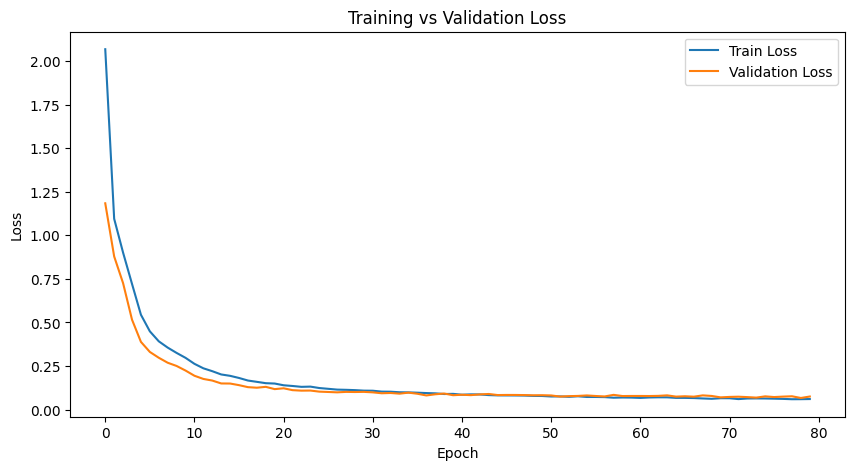

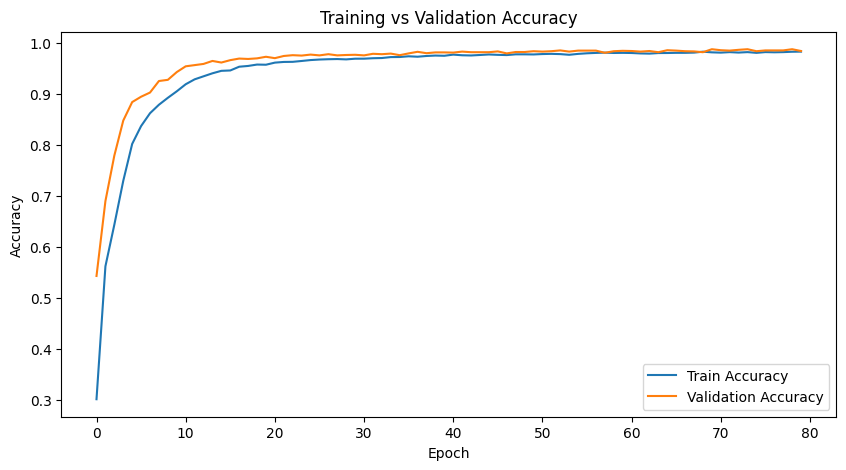

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

### Seeing the plots above, The Model is just right. There is no overfitting nor underfitting patterns. Both Val & Train Accuracies/Loss are on the same plotlines

## **Final Evaluation on the Test Set**
After selecting the best model using the validation set, the final evaluation is performed on the **test set** now based on the following:

- **Accuracy** : Achieved 98.7%
- **Precision** : Achieved 98.64%
- **Recall** : Achieved 98.66% 
- **F1score** : Achieved 98.64%

below are the results:

In [24]:
test_loss, test_acc, y_true, y_pred = evaluate_model(model, test_loader, criterion, device)

test_precision = precision_score(y_true, y_pred, average="macro")
test_recall = recall_score(y_true, y_pred, average="macro")
test_f1 = f1_score(y_true, y_pred, average="macro")

print(f"Test Loss      : {test_loss:.4f}")
print(f"Test Accuracy  : {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Precision : {test_precision:.4f}")
print(f"Test Recall    : {test_recall:.4f}")
print(f"Test F1-score  : {test_f1:.4f}")

Test Loss      : 0.0625
Test Accuracy  : 0.9870 (98.70%)
Test Precision : 0.9864
Test Recall    : 0.9866
Test F1-score  : 0.9864


### Classification report
The detailed classification report shows how well the model performs for each gesture class. It is very important since we can extract some patterns for a class and why is it falling behind. For example, the mute label has the lowest precision out of all of them. and if we take a look in the confusion matrix, we will actually found that mute is missclassified as one in 11 test cases. Therefore, we can assume the network has a fallback in separating between the two (mute, one) perfectly. We shouldn't also forget that mute was one of the undersampled feature.

In [25]:
print(classification_report(y_true, y_pred, target_names=le.classes_))

                 precision    recall  f1-score   support

           call       0.99      0.99      0.99       301
        dislike       1.00      1.00      1.00       259
           fist       0.99      0.99      0.99       189
           four       0.99      0.99      0.99       327
           like       0.99      0.99      0.99       287
           mute       0.93      0.98      0.95       217
             ok       0.99      0.99      0.99       318
            one       0.98      0.95      0.97       253
           palm       0.99      1.00      0.99       330
          peace       0.98      0.99      0.98       288
 peace_inverted       1.00      0.98      0.99       299
           rock       1.00      1.00      1.00       292
           stop       0.97      0.99      0.98       296
  stop_inverted       0.99      0.99      0.99       314
          three       1.00      0.98      0.99       291
         three2       1.00      0.99      0.99       331
         two_up       0.99    

### Confusion matrix
The confusion matrix provides a visual view of which gesture classes are recognized well and which ones are sometimes confused with each other.

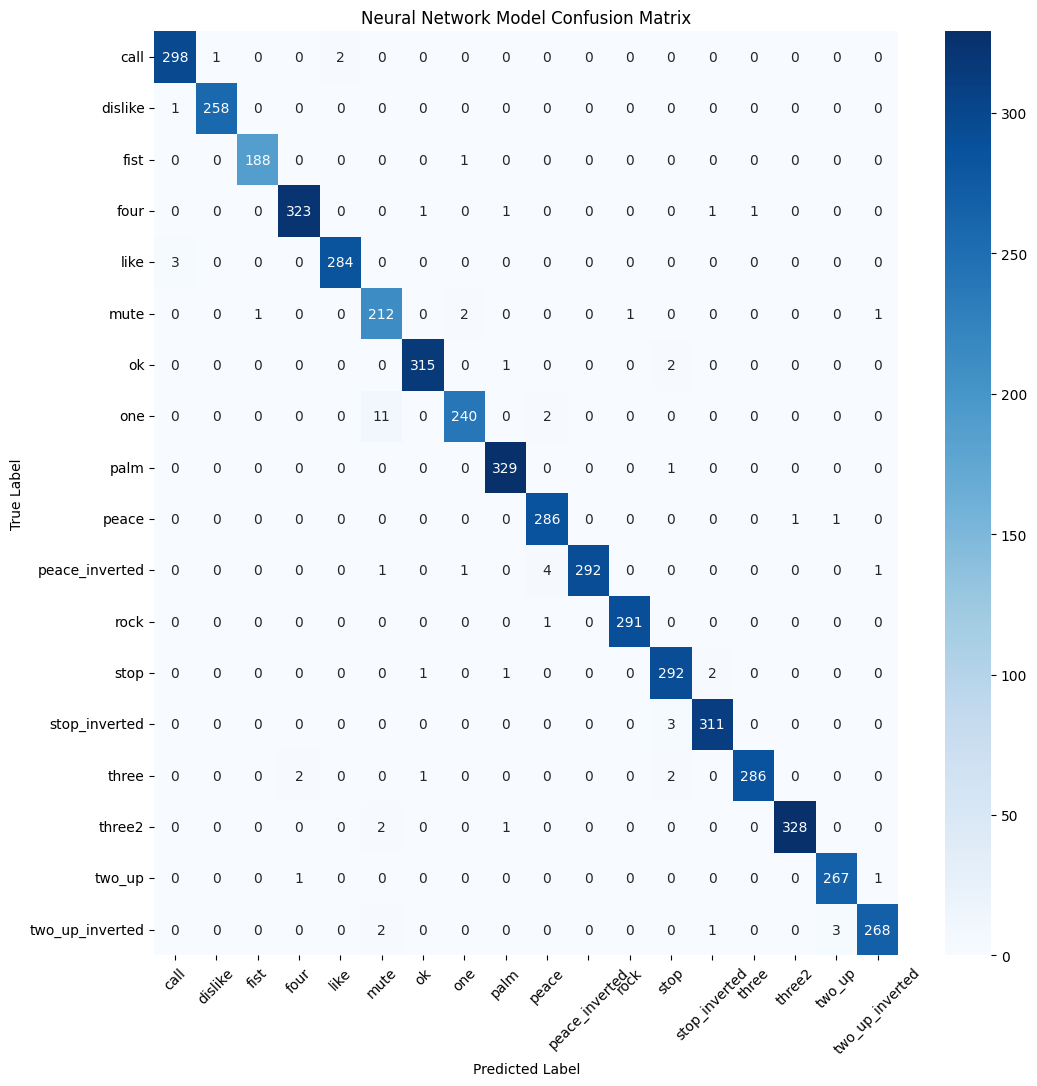

In [26]:
fig, ax = plt.subplots(figsize=(12, 12))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            ax=ax)
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Neural Network Model Confusion Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

## **Summary**
What I did in this DL pipeline in order is:
1. **Some Visualizing**: Visualized the data balance and some landmarks on hand with labels.
2. **Preprocessing:** normalize landmarks, and encode y labels.
3. **Data splitting:** splitting (train, val, test) [70%, 10%, 20%].
4. **Model design:** designing neural network  using pytorch for the 63 landmark features.
5. **Loss function:** cross-entropy is suitable because the task is multiclass classification (as I searched, it acts as softmax activation).
6. **Regularization:** dropout, weight decay, and early stopping were used to help reduce overfitting
7. **Evaluation:** accuracy, precision, f1, and recall were used to measure overall performance.

A possible limitation is that real time camera prediction may still be harder than offline notebook evaluation because live landmark extraction can be noisier due to pose, lighting, and such factors. So let us discover this in the upcoming cell using OpenCV and mediapipe to create a RT video:

## **Realtime Detection**

In [ ]:
model.eval()

mp_hands = mp.solutions.hands
mp_draw = mp.solutions.drawing_utils

hands = mp_hands.Hands(
    max_num_hands=1,
    min_detection_confidence=0.8,
    min_tracking_confidence=0.8
)

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Flip only for display/user comfort
    frame = cv2.flip(frame, 1)

    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hands.process(img_rgb)

    gesture_pred = "No hand detected"
    confidence = 0.0

    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            mp_draw.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            landmark_dict = {}
            for i, lm in enumerate(hand_landmarks.landmark):
                # IMPORTANT: do NOT mirror x again here
                landmark_dict[f'x{i+1}'] = lm.x
                landmark_dict[f'y{i+1}'] = lm.y
                landmark_dict[f'z{i+1}'] = lm.z

            realtime_df = pd.DataFrame([landmark_dict])

            # Ensure same column order as training
            realtime_df = realtime_df[X.columns]
            # print("RT:", realtime_df.columns.tolist())
            # print("X: ",X.columns.tolist())
            # Same preprocessing as training
            realtime_df_norm = normalize_landmarks(realtime_df.copy())
            realtime_tensor = torch.tensor(realtime_df_norm.values, dtype=torch.float32).to(device)

            with torch.no_grad():
                logits = model(realtime_tensor)
                probs = torch.softmax(logits, dim=1)
                conf, pred_class = torch.max(probs, dim=1)

            pred_class = pred_class.cpu().numpy()
            confidence = conf.item()
            gesture_pred = le.inverse_transform(pred_class)[0]

    text = f'{gesture_pred} ({confidence*100:.1f}%)'
    cv2.putText(frame, text, (20, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow("HaGRID Real-Time - PyTorch Model", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
hands.close()

#### Some of the Results Snippets that i have tested:

![Palm](5.png)

![Rock](3.png)

![Ok](1.png)
![Stop](4.png)

## **Conclusion**

The implemented model architecture is shown below:

```
ModelNN(
  (network): Sequential(
    (0): Linear(in_features=63, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=18, bias=True)
  )
)
```

The task remains a supervised **multiclass classification** problem. However, instead of relying on classical ML algorithms such as SVM, KNN, or Random Forest, the learning is through neural layers.

The final layer outputs **18 logits** (one per class), and training is performed using the **CrossEntropyLoss** function, which internally applies softmax to output a probability for each class

While the classical ML model i used previously achieved **97% accuracy**, the neural network achieved **98.7% test accuracy**. Additionally, the previous ML models struggled with confusion between **"Stop"** and **"Palm"** gestures. Using this model, each one of them are being predicted correctly.

Overall, the deep learning approach provided slightly higher accuracy and better results!


# Thank You

### Delivered by 
- Mohamed Abdelmohsen Soliman